In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('Kaggle_Training_Dataset_v2.csv')

In [4]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [5]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [7]:
df.shape

(1687861, 23)

In [8]:
df.isna().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [9]:
df['lead_time'].mean()

7.872267035168343

In [10]:
df["lead_time"].median()

8.0

In [11]:
df["lead_time"].fillna(df["lead_time"].median(),inplace = True)

In [12]:
df.isna().sum()

sku                  0
national_inv         1
lead_time            0
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
potential_issue      1
pieces_past_due      1
perf_6_month_avg     1
perf_12_month_avg    1
local_bo_qty         1
deck_risk            1
oe_constraint        1
ppap_risk            1
stop_auto_buy        1
rev_stop             1
went_on_backorder    1
dtype: int64

In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.drop("sku",axis = 1,inplace = True)

In [16]:
categorical_col = [col for col in df.columns if df[col].dtypes == 'object']

In [17]:
categorical_col

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [18]:
for i in categorical_col:
    print(df[i].value_counts())
    print()

potential_issue
No     1686953
Yes        907
Name: count, dtype: int64

deck_risk
No     1300377
Yes     387483
Name: count, dtype: int64

oe_constraint
No     1687615
Yes        245
Name: count, dtype: int64

ppap_risk
No     1484026
Yes     203834
Name: count, dtype: int64

stop_auto_buy
Yes    1626774
No       61086
Name: count, dtype: int64

rev_stop
No     1687129
Yes        731
Name: count, dtype: int64

went_on_backorder
No     1676567
Yes      11293
Name: count, dtype: int64



In [19]:
categorical_col 

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [20]:
df[categorical_col]

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,No,No,No,No,Yes,No,No
1,No,No,No,No,Yes,No,No
2,No,Yes,No,No,Yes,No,No
3,No,No,No,No,Yes,No,No
4,No,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...
1687855,No,Yes,No,No,Yes,No,No
1687856,No,No,No,No,Yes,No,No
1687857,No,Yes,No,No,No,No,Yes
1687858,No,No,No,No,Yes,No,No


In [21]:
for col in categorical_col:
    df[col].replace({"No":0,"Yes":1},inplace = True)

In [22]:
df[categorical_col]

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
1687855,0,1,0,0,1,0,0
1687856,0,0,0,0,1,0,0
1687857,0,1,0,0,0,0,1
1687858,0,0,0,0,1,0,0


In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1687860 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687860 non-null  int64  
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1687860 non-null  float64
 14  perf_12_month_avg  1687860 non-null  float64
 15  local_bo_qty       1687860 non-null  

In [24]:
df.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
national_inv,1.000000,0.003321,0.098238,0.078199,0.079744,0.078948,0.147449,0.192605,0.225067,0.239613,0.399969,0.000273,0.030677,-0.013544,-0.010732,0.014887,-0.005156,0.000185,-0.000062,-0.003380,-0.000305,-0.001315
lead_time,0.003321,1.000000,-0.006863,-0.008045,-0.008548,-0.008773,-0.005618,-0.006769,-0.007117,-0.007261,-0.007094,-0.005011,-0.001510,-0.052305,-0.049527,-0.001259,0.134983,-0.003095,0.010739,-0.240950,0.001077,-0.018104
in_transit_qty,0.098238,-0.006863,1.000000,0.662648,0.687768,0.679152,0.619270,0.698417,0.689908,0.659372,0.749974,0.007126,0.167460,0.003282,0.004292,0.066612,-0.016188,0.002565,-0.000671,-0.001085,0.000644,-0.002427
forecast_3_month,0.078199,-0.008045,0.662648,1.000000,0.990490,0.977337,0.684494,0.781178,0.835585,0.825539,0.725042,0.007378,0.361214,0.008445,0.008694,0.039419,-0.017508,0.002798,-0.003625,0.002836,0.000574,-0.000340
forecast_6_month,0.079744,-0.008548,0.687768,0.990490,1.000000,0.994945,0.701770,0.808755,0.868099,0.858253,0.738553,0.006573,0.363147,0.008343,0.008499,0.039724,-0.017789,0.002473,-0.003864,0.003413,-0.000059,-0.000840
forecast_9_month,0.078948,-0.008773,0.679152,0.977337,0.994945,1.000000,0.716367,0.829911,0.891884,0.881894,0.735891,0.006324,0.366001,0.008306,0.008421,0.039732,-0.017939,0.002493,-0.003956,0.003536,-0.000274,-0.001030
sales_1_month,0.147449,-0.005618,0.619270,0.684494,0.701770,0.716367,1.000000,0.918548,0.867479,0.815959,0.756137,0.004355,0.249526,0.001163,0.002370,0.066188,-0.014748,0.003402,-0.000919,-0.004737,-0.000541,-0.001131
sales_3_month,0.192605,-0.006769,0.698417,0.781178,0.808755,0.829911,0.918548,1.000000,0.975594,0.929491,0.856017,0.004916,0.304565,0.001488,0.002837,0.071030,-0.017196,0.003500,-0.001229,-0.004920,-0.000576,-0.001512
sales_6_month,0.225067,-0.007117,0.689908,0.835585,0.868099,0.891884,0.867479,0.975594,1.000000,0.971833,0.837110,0.004841,0.323552,0.002898,0.004221,0.057765,-0.018170,0.003624,-0.002208,-0.002972,-0.000541,-0.001728
sales_9_month,0.239613,-0.007261,0.659372,0.825539,0.858253,0.881894,0.815959,0.929491,0.971833,1.000000,0.800890,0.004669,0.317692,0.003438,0.004749,0.048880,-0.018165,0.003477,-0.002783,-0.001894,-0.000547,-0.001764


In [25]:
# feature Selection

corr_matrix = df.corr()
corr_with_y = corr_matrix["went_on_backorder"].drop('went_on_backorder').reset_index()
corr_with_y

,index,went_on_backorder
0,national_inv,-0.001315
1,lead_time,-0.018104
2,in_transit_qty,-0.002427
3,forecast_3_month,-0.000340
4,forecast_6_month,-0.000840
5,forecast_9_month,-0.001030
6,sales_1_month,-0.001131
7,sales_3_month,-0.001512
8,sales_6_month,-0.001728
9,sales_9_month,-0.001764


In [26]:
features = ['national_inv','lead_time','sales_1_month','pieces_past_due','perf_6_month_avg','in_transit_qty','local_bo_qty',
            'deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']

In [27]:
x = df[features]
y = df["went_on_backorder"]

In [28]:
x.shape

(1687860, 12)

<Axes: >

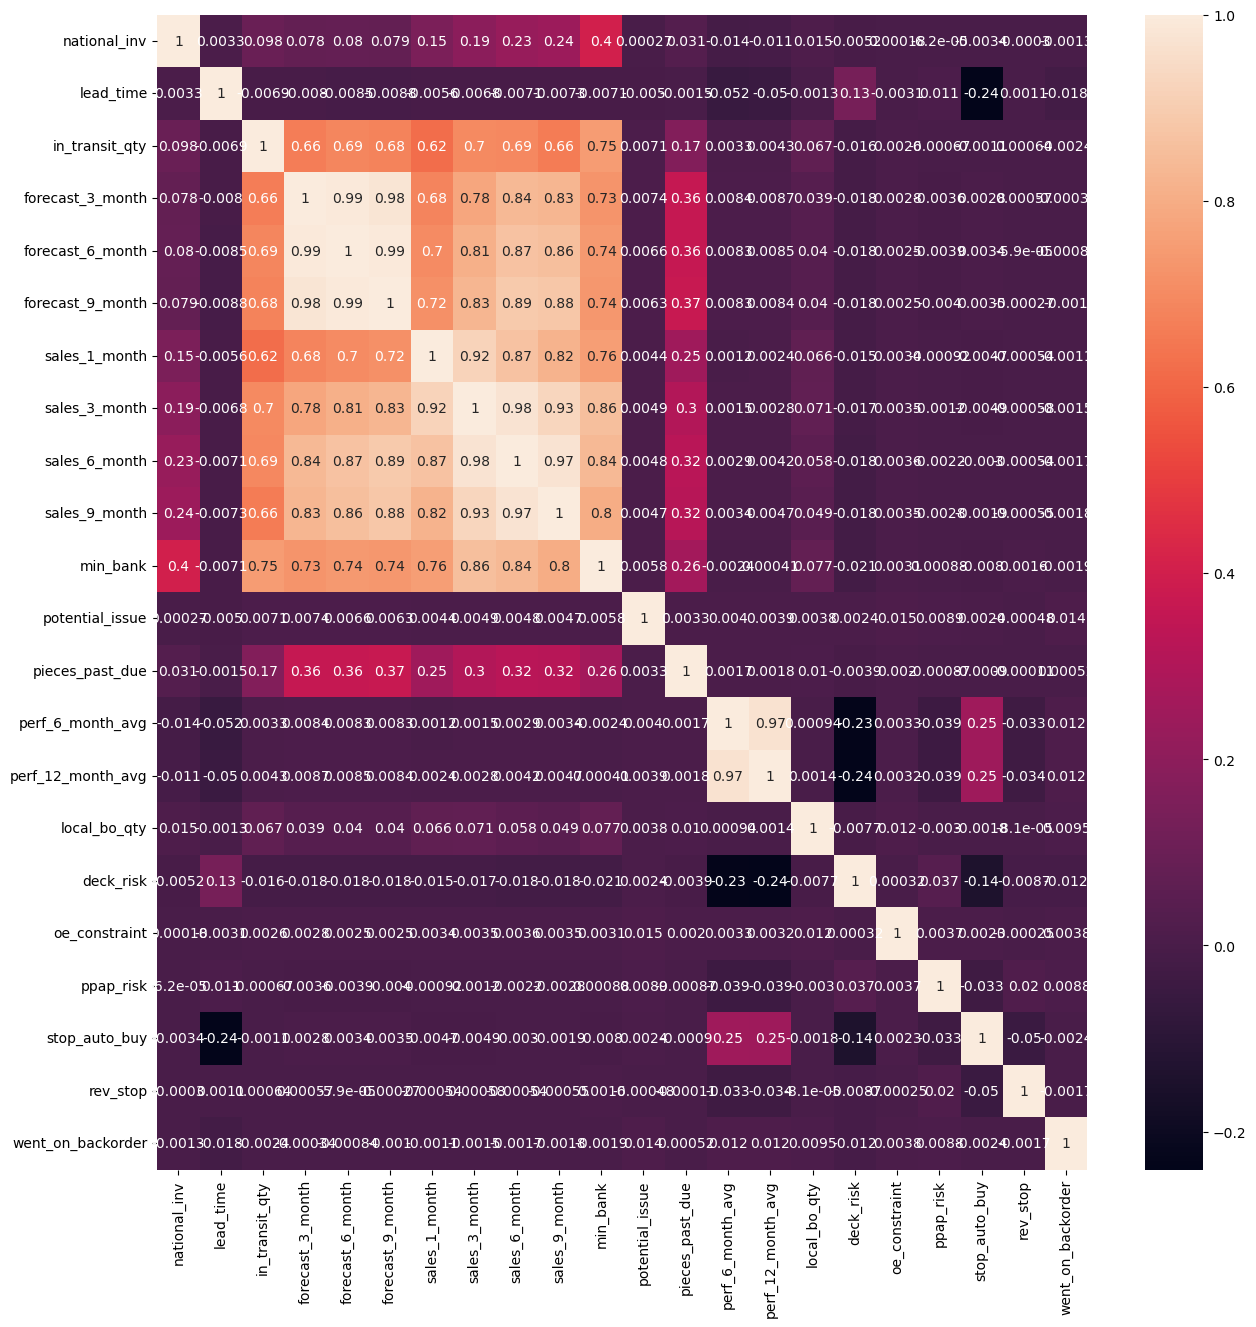

In [29]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True)

In [30]:
df['went_on_backorder'].value_counts()

went_on_backorder
0    1676567
1      11293
Name: count, dtype: int64

In [31]:
#here we need resample because of the class imbalance
# we perfroms SMOTE 

In [32]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state = 1)
X,Y = oversample.fit_resample(x,y)

In [33]:
Y.value_counts().reset_index()

,went_on_backorder,count
0,0,1676567
1,1,1676567


In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [35]:
X_train.shape

(2682507, 12)

In [36]:
X_test.shape

(670627, 12)

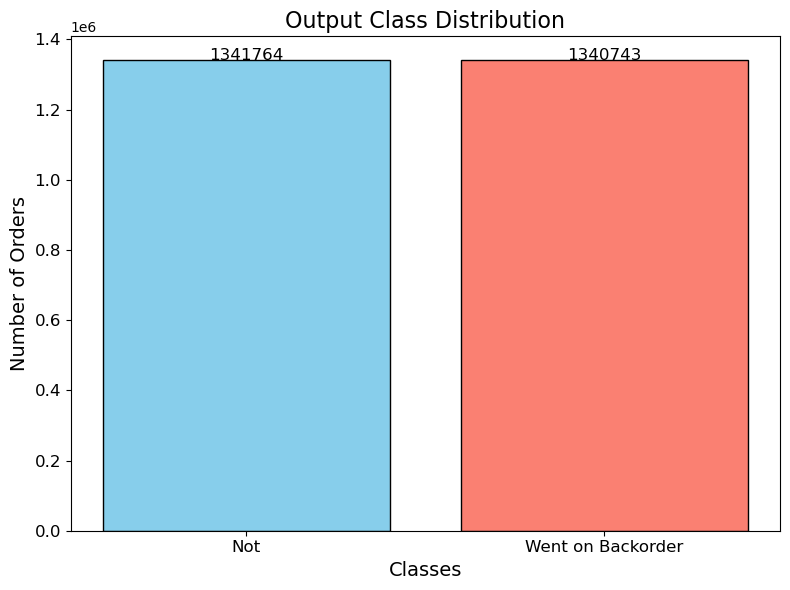

In [37]:
import matplotlib.pyplot as plt

# Data for bar plot
classes = ['Not', 'Went on Backorder']
values = Y_train.value_counts()

# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size for better proportions
plt.bar(classes, values, color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Output Class Distribution", fontsize=16)
plt.ylabel("Number of Orders", fontsize=14)
plt.xlabel("Classes", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add data labels
for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=12)

plt.tight_layout()  # Avoid layout overlap
plt.show()


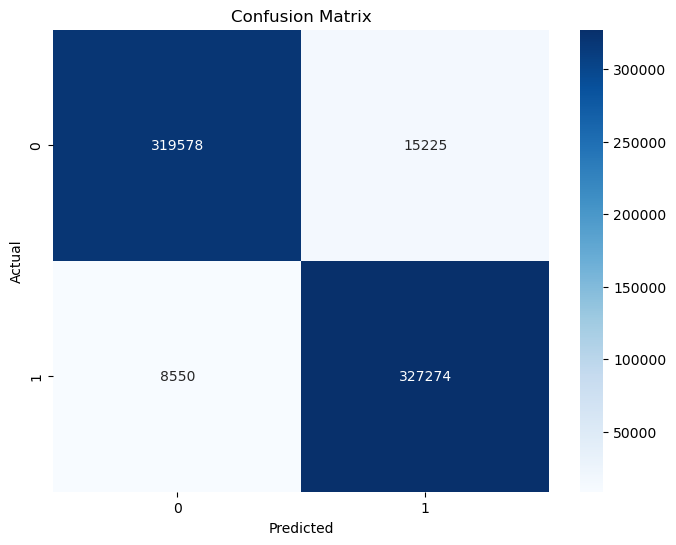

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96    334803
           1       0.96      0.97      0.96    335824

    accuracy                           0.96    670627
   macro avg       0.96      0.96      0.96    670627
weighted avg       0.96      0.96      0.96    670627



In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)


cm = confusion_matrix(Y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels="auto", yticklabels="auto")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("Classification Report:")
print(classification_report(Y_test, y_pred))


In [55]:
import joblib

In [57]:
joblib.dump(classifier,"BackOrderModel.joblib")


['BackOrderModel.joblib']

In [60]:
import pickle
pickle.dump(classifier,open("BackOmodel.pkl","wb"))